In [2]:
lamanno_dir = "/nfs/leia/research/stegle/dseaton/data/scrnaseq_datasets/lemanno2016_mouse_human_DAneuron/"

In [3]:
list.files(lamanno_dir)

[1] "create_scanpy_object.py"                               
 [2] "GSE76381_EmbryoMoleculeCounts.cef.txt"                 
 [3] "GSE76381_EmbryoMoleculeCounts.cef.txt.h5ad"            
 [4] "GSE76381_ESMoleculeCounts.cef.txt"                     
 [5] "GSE76381_ESMoleculeCounts.cef.txt.h5ad"                
 [6] "GSE76381_iPSMoleculeCounts.cef.txt"                    
 [7] "GSE76381_iPSMoleculeCounts.cef.txt.h5ad"               
 [8] "lemanno2016_human_embryo_brain_markers.tsv"            
 [9] "lemanno2016_midbrain_celltype_marker_binary_matrix.csv"
[10] "parse_cell_type_marker_table.py"                       
[11] "table_S2_cell_type_markers.xlsx"

In [4]:
filename1 = paste0(lamanno_dir, 'lemanno2016_human_embryo_brain_markers.tsv')
df1 = read.csv(filename1, sep = "\t")
head(df1)

marker_gene,celltype_id
ACTB,Basal
ACTG1,Basal
ATF4,Basal
ATP5B,Basal
ATP5E,Basal
ATP5F1,Basal


In [28]:
filename = paste0(lamanno_dir, 'GSE76381_EmbryoMoleculeCounts.cef.txt')
df = read.csv(filename, sep = "\t")

In [29]:
head(df)

CEF,X0,X1,X3,X19531,X1977,X0.1,X,X.1,X.2,...,X.1962,X.1963,X.1964,X.1965,X.1966,X.1967,X.1968,X.1969,X.1970,X.1971
,Cell_ID,1772067_089_A01,1772067_089_A02,1772067_089_A03,1772067_089_A04,1772067_089_A05,1772067_089_A06,1772067_089_A08,1772067_089_A09,...,1772122_224_H01,1772122_224_H02,1772122_224_H04,1772122_224_H05,1772122_224_H06,1772122_224_H07,1772122_224_H08,1772122_224_H09,1772122_224_H10,1772122_224_H12
,Cell_type,hMgl,hRgl2a,Unk,hNProg,hProgBP,hProgM,hNProg,hOMTN,...,Unk,hNProg,hProgBP,Unk,Unk,hOMTN,hProgBP,hMgl,hNProg,hNProg
,Timepoint,week_7,week_7,week_7,week_7,week_7,week_7,week_7,week_7,...,week_8,week_8,week_8,week_8,week_8,week_8,week_8,week_8,week_8,week_8
Gene,,,,,,,,,,...,,,,,,,,,,
DDX11L1,,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
WASH7P_p1,,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
meta_df = as.data.frame(t(df[1:3,3:ncol(df)]))
colnames(meta_df) = df[1:3,2]
rownames(meta_df) = meta_df$Cell_ID
head(meta_df)

,Cell_ID,Cell_type,Timepoint
1772067_089_A01,1772067_089_A01,hMgl,week_7
1772067_089_A02,1772067_089_A02,hRgl2a,week_7
1772067_089_A03,1772067_089_A03,Unk,week_7
1772067_089_A04,1772067_089_A04,hNProg,week_7
1772067_089_A05,1772067_089_A05,hProgBP,week_7
1772067_089_A06,1772067_089_A06,hProgM,week_7


In [82]:
inner_df = df[5:nrow(df),3:ncol(df)]

In [67]:
nrow(inner_df)
ncol(inner_df)

[1] 19531

[1] 1977

In [68]:
counts_df = matrix(0, nrow = nrow(inner_df), ncol = ncol(inner_df))
for (i in 1:ncol(inner_df)){
    counts_df[,i] = as.numeric(as.character(unlist(inner_df[,i])))
}

In [71]:
counts_df[1:5,1:5]
str(counts_df)

0,0,0,0,0
0,0,1,0,0
0,0,0,0,0
1,0,0,0,0
0,0,0,0,0


 num [1:19531, 1:1977] 0 0 0 1 0 0 0 1 0 0 ...


In [72]:
rownames(counts_df) = df[5:nrow(df),1]
colnames(counts_df) = meta_df$Cell_ID
counts_df[1:5,1:5]

,1772067_089_A01,1772067_089_A02,1772067_089_A03,1772067_089_A04,1772067_089_A05
DDX11L1,0,0,0,0,0
WASH7P_p1,0,0,1,0,0
LINC01002_loc4,0,0,0,0,0
LOC100133331_loc1,1,0,0,0,0
LOC100132287_loc2,0,0,0,0,0


In [73]:
min(counts_df)
max(counts_df)

[1] 0

[1] 1616

In [74]:
library(SingleCellExperiment)

In [75]:
sce_lamanno <- SingleCellExperiment(
assays = list(counts = counts_df),
colData = meta_df)
sce_lamanno

class: SingleCellExperiment 
dim: 19531 1977 
metadata(0):
assays(1): counts
rownames(19531): DDX11L1 WASH7P_p1 ... VAMP7_loc1 DDX11L16_loc1
rowData names(0):
colnames(1977): 1772067_089_A01 1772067_089_A02 ... 1772122_224_H10
  1772122_224_H12
colData names(3): Cell_ID Cell_type Timepoint
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [76]:
saveRDS(sce_lamanno, "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/in_vivo_comparison/sce_lamanno_embryo.Rds")

In [1]:
LM = readRDS("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/in_vivo_comparison/sce_lamanno_embryo.Rds")

In [8]:
LM

class: SingleCellExperiment 
dim: 19531 1977 
metadata(0):
assays(2): counts logcounts
rownames(19531): DDX11L1 WASH7P_p1 ... VAMP7_loc1 DDX11L16_loc1
rowData names(0):
colnames(1977): 1772067_089_A01 1772067_089_A02 ... 1772122_224_H10
  1772122_224_H12
colData names(3): Cell_ID Cell_type Timepoint
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [3]:
str(counts(LM))

 num [1:19531, 1:1977] 0 0 0 1 0 0 0 1 0 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:19531] "DDX11L1" "WASH7P_p1" "LINC01002_loc4" "LOC100133331_loc1" ...
  ..$ : chr [1:1977] "1772067_089_A01" "1772067_089_A02" "1772067_089_A03" "1772067_089_A04" ...


In [4]:
counts(LM)[1:5,1:5]

,1772067_089_A01,1772067_089_A02,1772067_089_A03,1772067_089_A04,1772067_089_A05
DDX11L1,0,0,0,0,0
WASH7P_p1,0,0,1,0,0
LINC01002_loc4,0,0,0,0,0
LOC100133331_loc1,1,0,0,0,0
LOC100132287_loc2,0,0,0,0,0


In [5]:
LM <- scater::logNormCounts(LM, log=T)
alt.fit2 <- scran::trendVar(LM, use.spikes = FALSE)
alt.decomp2 <- scran::decomposeVar(LM, alt.fit2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
“'trendVar' is deprecated.
Use 'modelGeneVar' instead.
See help("Deprecated")”Warning message:
“'decomposeVar' is deprecated.
Use 'modelGeneVar' instead.
See help("Deprecated")”Warning message:
“'testVar' is deprecated.
See help("Deprecated")”

In [6]:
genes_LM = rownames(alt.decomp2[order(alt.decomp2$bio, decreasing = TRUE),][1:2000,])

In [7]:
length(genes_LM)

[1] 2000

In [9]:
mydir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/in_vivo_comparison/"

In [10]:
neuroseq_filename = paste0(mydir,"neuroseq_all_25pct_sce.Rds")
neuroseq = readRDS(neuroseq_filename)

In [11]:
# neuroseq = neuroseq[,neuroseq$celltype %in% c('DA','Sert','CHem')]

In [12]:
neuroseq <- scater::logNormCounts(neuroseq, log=T)
design <- model.matrix(~pool_id, data = colData(neuroseq))
alt.fit <- scran::trendVar(neuroseq, design = design, use.spikes = FALSE)
alt.decomp <- scran::decomposeVar(neuroseq, alt.fit)

Warning message:
“'trendVar' is deprecated.
Use 'modelGeneVar' instead.
See help("Deprecated")”Warning message:
“'decomposeVar' is deprecated.
Use 'modelGeneVar' instead.
See help("Deprecated")”Warning message:
“'testVar' is deprecated.
See help("Deprecated")”

In [13]:
genes_neuroseq = rownames(alt.decomp[order(alt.decomp$bio, decreasing = TRUE),][1:2000,])

In [14]:
all_genes = unique(c(genes_LM,genes_neuroseq))

In [15]:
genes_n = rownames(neuroseq)[rownames(neuroseq) %in% all_genes]
common_genes = rownames(LM)[rownames(LM) %in% genes_n]

In [16]:
length(common_genes)

[1] 3023

In [17]:
query = neuroseq[common_genes,]
reference = LM[common_genes,]

In [18]:
query$batch_factor = "query"
reference$batch_factor = "reference"

In [19]:
getJointPCA = function(reference, query, 
                       assayNameRef = "logcounts",
                       assayNameQuery = "logcounts") {
# reference and query are SingleCellExperiment objects
  all_assay = cbind(assay(query, assayNameQuery),
                    assay(reference, assayNameRef))
# batch factors can be dataset specific batches or just a factor labelling i.e. "query", "reference" 
#   batchFactor = factor(c(as.character(query$sample_id),
#                            as.character(reference$dataset)))
 batchFactor = factor(c(as.character(query$batch_factor),
                           as.character(reference$batch_factor)))
#   print(table(batchFactor))
  mbpca = batchelor::multiBatchPCA(all_assay,
                        batch = batchFactor,
                        d = 50
                        # BPPARAM = BiocParallel::MulticoreParam(workers = 4)
  )
  print("done multibatch PCA")
  dim(mbpca[[1]])
  out = do.call(batchelor::reducedMNN, mbpca)
  print("done batch correction")
  joint_mnn_pca = out$corrected
  return(joint_mnn_pca)
}

In [20]:
joint_mnn_pca = getJointPCA(reference, query)

Warning message in sweep(centered, 2, w, "/", check.margin = FALSE):
“'check.margin' is ignored when 'x' is a DelayedArray object or
  derivative”

[1] "done multibatch PCA"
[1] "done batch correction"


In [21]:
df_pca = as.data.frame(joint_mnn_pca[,c(1:2)])
colnames(df_pca) = paste0("PC",1:2)
head(df_pca)

,PC1,PC2
TTCCCAGGTTCCATGA-1-0,-16.31450,13.04748
AACCGCGAGGTCATCT-1-0,-16.15690,12.01172
TCACAAGTCTTATCTG-1-0,-15.80240,13.40821
TACCTTACACGGTTTA-1-0,-13.70096,12.09009
CCTAGCTAGCGCCTTG-1-0,-16.16257,11.96530
CAAGATCAGGCTCTTA-1-0,-16.03932,12.80514


In [22]:
mat = matrix(0, nrow = length(unique(query$celltype)), ncol = length(unique(reference$Cell_type)))
nrow(mat)
ncol(mat)

[1] 11

[1] 26

In [23]:
rownames(mat) = unique(query$celltype)
colnames(mat) = unique(reference$Cell_type)

In [24]:
i = 0
for (celltype in unique(query$celltype)){
#     print(celltype)
    j = 0
    i = i+1
    sel_cells = colnames(query[,query$celltype == celltype])
    closest_atlas_cell_ind = BiocNeighbors::queryKNN(
        joint_mnn_pca[colnames(reference),],
        joint_mnn_pca[sel_cells,],
        k = 2, get.index = TRUE, get.distance = FALSE)
    mapped_cells = colnames(reference)[closest_atlas_cell_ind$index]
    for (cluster in unique(reference$Cell_type)){
#         print(cluster)
        j = j+1
        n = length(mapped_cells[mapped_cells %in% colnames(reference[,reference$Cell_type == cluster])])
        mat[i,j] = n/length(mapped_cells)
#         print(mat[i,j])
    }
}

Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning messa

In [27]:
# mat[,c("hDA0","hDA1","hDA2","hSert")]

,hDA0,hDA1,hDA2,hSert
FPP,1.242854e-05,1.242854e-05,0.0000000000,0.000000e+00
P_FPP,1.485933e-04,0.000000e+00,0.0000000000,0.000000e+00
NB,0.000000e+00,0.000000e+00,0.0000000000,0.000000e+00
Sert,2.917865e-03,1.127789e-02,0.0001085717,8.142880e-05
DA,5.587061e-03,6.300124e-02,0.0416261199,1.282340e-01
CHem,4.738438e-04,1.118271e-02,0.0029378317,4.477824e-02
unknown,1.163435e-02,4.819945e-02,0.0005540166,1.939058e-03
Astro,1.745932e-05,0.000000e+00,0.0000000000,0.000000e+00
Epen1,2.082379e-05,2.082379e-05,0.0000000000,2.082379e-05
P_Sert,3.846154e-03,0.000000e+00,0.0000000000,0.000000e+00


In [25]:
library(reshape2)
mat_melt = melt(mat)
head(mat_melt)

Var1,Var2,value
FPP,hMgl,2.485707e-05
P_FPP,hMgl,1.155726e-04
NB,hMgl,0.000000e+00
Sert,hMgl,1.357147e-05
DA,hMgl,0.000000e+00
CHem,hMgl,0.000000e+00


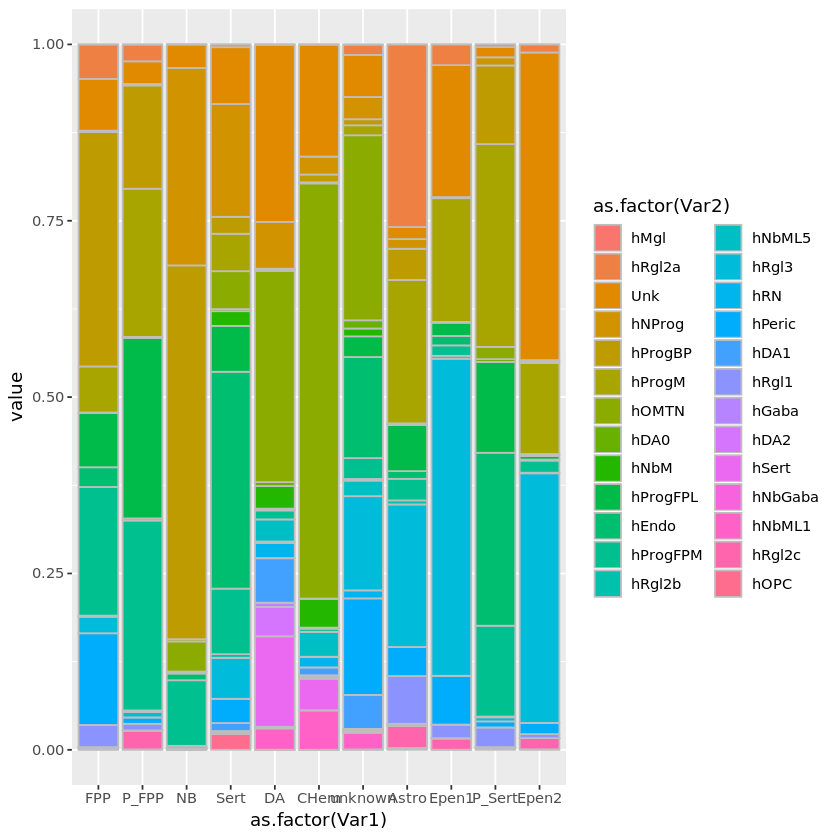

In [26]:
library(ggplot2)
df = as.data.frame(mat_melt)
ggplot(df, aes(x = as.factor(Var1), y = value, fill = as.factor(Var2))) + geom_bar(stat="identity", col = "grey")

In [45]:
sel_cells = colnames(neuroseq[,neuroseq$celltype == 'DA'])
# sel_cells = colnames(neuroseq[,neuroseq$time_point == 'D52' & neuroseq$celltype == 'DA' & neuroseq$treatment == 'NONE'])
length(sel_cells)

Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] 29801

In [46]:
closest_atlas_cell_ind = BiocNeighbors::queryKNN(
    joint_mnn_pca[colnames(LM),],
    joint_mnn_pca[sel_cells,],
  k = 1, get.index = TRUE, get.distance = FALSE)

In [47]:
mapped_cells = colnames(LM)[closest_atlas_cell_ind$index]

In [48]:
df = as.data.frame(colData(LM))

In [49]:
df_mapped = df[mapped_cells,]
nrow(df_mapped)
nrow(df_mapped[df_mapped$Cell_type == "hDA0",])/nrow(df_mapped)
nrow(df_mapped[df_mapped$Cell_type == "hDA1",])/nrow(df_mapped)
nrow(df_mapped[df_mapped$Cell_type == "hDA2",])/nrow(df_mapped)
nrow(df_mapped[df_mapped$Cell_type == "hSert",])/nrow(df_mapped)
nrow(df_mapped[df_mapped$Cell_type == "hOMTN",])/nrow(df_mapped)
nrow(df_mapped[df_mapped$Cell_type == "Unk",])/nrow(df_mapped)

[1] 29801

[1] 0.003926043

[1] 0.06305158

[1] 0.03355592

[1] 0.1012718

[1] 0.3294856

[1] 0.2604946